In [1]:
import h5py
import numpy as np
import os, glob, shutil
import pathlib
SRC_DIR = "./processed/"
DST_DIR = "/mnt/ssd2/h36m-fetch/merged/"

TRAIN_SUBJECT = ["S1", "S5", "S6", "S7", "S8"]
TEST_SUBJECT = ["S9", "S11"]

CATEGORY = ["Directions", "Discussion", "Eating", "Greeting", "Phoning", "Purchases", "Sitting", "SittingDown", "Smoking", "TakingPhoto","Waiting","Walking", "WalkingDog", "WalkingTogether"]
CAMERA_ID = ["54138969","55011271","58860488","60457274"]
NUMBER = ["-1","-2"]

os.makedirs(os.path.join('./merged'), exist_ok=True)
os.makedirs(os.path.join(DST_DIR, 'train'), exist_ok=True)
os.makedirs(os.path.join(DST_DIR, 'test'), exist_ok=True)



In [2]:
merged_2d = None
merged_3d = None
merged_angle = None
merged_bbox = None
merged_action = None
merged_subject_id = None
file_id = 0
for subject in TRAIN_SUBJECT:
    print(subject)
    for category in CATEGORY:
        for num in NUMBER:
            data = h5py.File(os.path.join(SRC_DIR, subject, category+num,"annot.h5"), 'r')
            pose_2d = data["pose"]['2d']
            pose_3d = data["pose"]['3d']
            angle = data["pose"]['angle']
            bbox = data["pose"]['bbox']
            action = data['action']
            subject_id = data['subject'] 
            img_path = []
            for id in CAMERA_ID:
                img_path += sorted(glob.glob(os.path.join(SRC_DIR, subject, category+num,"imageSequence", id, "*.jpg")))

            assert(pose_2d.shape[0] == pose_3d.shape[0] == angle.shape[0] == bbox.shape[0] == action.shape[0] == subject_id.shape[0] == len(img_path))

            if merged_2d is None:
                merged_2d = pose_2d
                merged_3d = pose_3d
                merged_angle = angle
                merged_bbox = bbox
                merged_action = action
                merged_subject_id = subject_id
            else:
                merged_2d = np.vstack((merged_2d, pose_2d))
                merged_3d = np.vstack((merged_3d, pose_3d))
                merged_angle = np.vstack((merged_angle, angle))
                merged_bbox = np.vstack((merged_bbox, bbox))
                merged_action = np.hstack((merged_action, action))
                merged_subject_id = np.hstack((merged_subject_id, subject_id))
            
            for i in range(len(img_path)):
                shutil.copy2(img_path[i], os.path.join(DST_DIR, "train", str(file_id).zfill(6) + ".jpg"))
                file_id += 1
                
assert(merged_2d.shape[0] == merged_3d.shape[0] == merged_action.shape[0] == merged_angle.shape[0] == merged_bbox.shape[0] == merged_subject_id.shape[0] == file_id)
np.savez(os.path.join(DST_DIR, 'train', 'annot.npz'), pose_2d=merged_2d, pose_3d=merged_3d, angle=merged_angle, action=merged_action, bbox=merged_bbox, subject=merged_subject_id)

print("Done")

S1
S5
S6
S7
S8


In [3]:
merged_2d = None
merged_3d = None
merged_angle = None
merged_bbox = None
merged_action = None
merged_subject_id = None
file_id = 0
for subject in TEST_SUBJECT:
    print(subject)
    for category in CATEGORY:
        for num in NUMBER:
            data = h5py.File(os.path.join(SRC_DIR, subject, category+num,"annot.h5"), 'r')
            print(subject, category, num)
            pose_2d = data["pose"]['2d']
            pose_3d = data["pose"]['3d']
            angle = data["pose"]['angle']
            bbox = data["pose"]['bbox']
            action = data['action']
            subject_id = data['subject']
            img_path = []
            for id in CAMERA_ID:
                img_path.extend(sorted(glob.glob(os.path.join(SRC_DIR, subject, category+num,"imageSequence", id, "*.jpg"))))
            
            assert(pose_2d.shape[0] == pose_3d.shape[0] == angle.shape[0] == bbox.shape[0] == action.shape[0] == subject_id.shape[0] == len(img_path))

            if merged_2d is None:
                merged_2d = pose_2d
                merged_3d = pose_3d
                merged_angle = angle
                merged_bbox = bbox
                merged_action = action
                merged_subject_id = subject_id
            else:
                merged_2d = np.vstack((merged_2d, pose_2d))
                merged_3d = np.vstack((merged_3d, pose_3d))
                merged_angle = np.vstack((merged_angle, angle))
                merged_bbox = np.vstack((merged_bbox, bbox))
                merged_action = np.hstack((merged_action, action))
                merged_subject_id = np.hstack((merged_subject_id, subject_id))
            
            for i in range(len(img_path)):
                shutil.copy2(img_path[i], os.path.join(DST_DIR, "test", str(file_id).zfill(6) + ".jpg"))
                file_id += 1
                
assert(merged_2d.shape[0] == merged_3d.shape[0] == merged_action.shape[0] == merged_angle.shape[0] == merged_bbox.shape[0] == merged_subject_id.shape[0] == file_id)
np.savez(os.path.join(DST_DIR, 'test', 'annot.npz'), pose_2d=merged_2d, pose_3d=merged_3d, angle=merged_angle, action=merged_action, bbox=merged_bbox, subject=merged_subject_id)
print("Done")

S9
S9 Directions -1
S9 Directions -2
S9 Discussion -1
S9 Discussion -2
S9 Eating -1
S9 Eating -2
S9 Greeting -1
S9 Greeting -2
S9 Phoning -1
S9 Phoning -2
S9 Purchases -1
S9 Purchases -2
S9 Sitting -1
S9 Sitting -2
S9 SittingDown -1
S9 SittingDown -2
S9 Smoking -1
S9 Smoking -2
S9 TakingPhoto -1
S9 TakingPhoto -2
S9 Waiting -1
S9 Waiting -2
S9 Walking -1
S9 Walking -2
S9 WalkingDog -1
S9 WalkingDog -2
S9 WalkingTogether -1
S9 WalkingTogether -2
S11
S11 Directions -1
S11 Directions -2
S11 Discussion -1
S11 Discussion -2
S11 Eating -1
S11 Eating -2
S11 Greeting -1
S11 Greeting -2
S11 Phoning -1
S11 Phoning -2
S11 Purchases -1
S11 Purchases -2
S11 Sitting -1
S11 Sitting -2
S11 SittingDown -1
S11 SittingDown -2
S11 Smoking -1
S11 Smoking -2
S11 TakingPhoto -1
S11 TakingPhoto -2
S11 Waiting -1
S11 Waiting -2
S11 Walking -1
S11 Walking -2
S11 WalkingDog -1
S11 WalkingDog -2
S11 WalkingTogether -1
S11 WalkingTogether -2
Done


In [5]:
img_list = sorted(glob.glob(os.path.join(DST_DIR,'train', '*.jpg')))
annot_data = np.load(os.path.join(DST_DIR,'train', 'annot.npz'))

joint_list = [0,1,2,3,6,7,8,12,13,14,15,17,18,19,25,26,27]

1 2
(612700, 32, 2) (612700, 4) 612700
/mnt/ssd2/h36m-fetch/merged/train/001600.jpg
(1002, 1000, 3)
(612700, 32, 2)


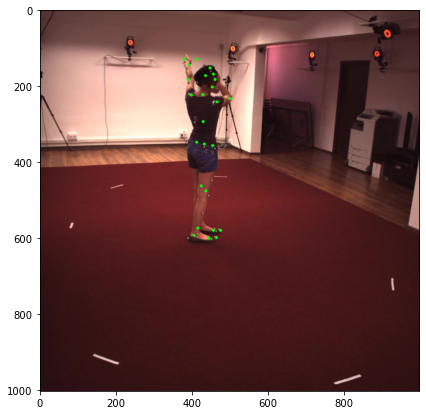

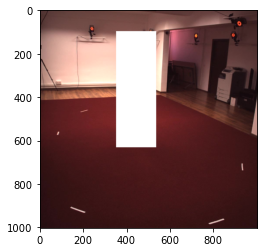

In [7]:
import cv2
import matplotlib.pyplot as plt
idx = 1600

bbox_arr = annot_data['bbox']
pose = annot_data['pose_2d']
subject = annot_data['subject']
action = annot_data['action']

print(subject[idx], action[idx])
print(pose.shape, bbox_arr.shape, len(img_list))
img = cv2.cvtColor(cv2.imread(img_list[idx]), cv2.COLOR_BGR2RGB)
print(img_list[idx])
print(img.shape)
bbox_img = cv2.rectangle(img.copy(), (bbox_arr[idx][0], bbox_arr[idx][1]), (bbox_arr[idx][0]+ bbox_arr[idx][2], bbox_arr[idx][1]+ bbox_arr[idx][3]), (255,255,255), -1)
print(pose.shape)
for i in range(32):
    img = cv2.circle(img, (int(pose[idx][i][0]), int(pose[idx][i][1])), 4, (0,255,0), -1)
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.figure()
plt.imshow(bbox_img)


In [205]:
data = h5py.File(os.path.join(SRC_DIR, 'S1', 'Directions'+'-2',"annot.h5"), 'r')


In [202]:
print(np.array(data['camera']))

[54138969 54138969 54138969 54138969 54138969 54138969 54138969 54138969
 54138969 54138969 54138969 54138969 54138969 54138969 54138969 54138969
 54138969 54138969 54138969 54138969 54138969 54138969 55011271 55011271
 55011271 55011271 55011271 55011271 55011271 55011271 55011271 55011271
 55011271 55011271 55011271 55011271 55011271 55011271 55011271 55011271
 55011271 55011271 55011271 55011271 58860488 58860488 58860488 58860488
 58860488 58860488 58860488 58860488 58860488 58860488 58860488 58860488
 58860488 58860488 58860488 58860488 58860488 58860488 58860488 58860488
 58860488 58860488 60457274 60457274 60457274 60457274 60457274 60457274
 60457274 60457274 60457274 60457274 60457274 60457274 60457274 60457274
 60457274 60457274 60457274 60457274 60457274 60457274 60457274 60457274]
